In [4]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the data
data = pd.read_csv('./sampled_data_reduced_50.csv')

# Ensure the TIME column is in datetime format
data['TIME'] = pd.to_datetime(data['TIME'])

# Print the column names for debugging
print("Columns in the dataset:", data.columns.tolist())

Columns in the dataset: ['TIME', '01_DL_FLCOR_CH0E_REV1_ > 001_ECHW_TMP', '01_DL_FLCOR_CH0E_REV1_ > 002_LCHW_TEMP', '01_DL_FLCOR_CH0E_REV1_ > 003_CHW_PMP1_ENA', '01_DL_FLCOR_CH0E_REV1_ > 005_CHW_FLO', '01_DL_FLCOR_CH0E_REV1_ > 064_CHLR_ENA', '01_DL_FLCOR_CH0E_REV1_ > 067_CW_SP', '01_DL_FLCOR_CH0E_REV1_ > 072_MACHINE_CAP', '01_DL_FLCOR_CH0E_REV1_ > 073_AMB_TMP_DB', '01_DL_FLCOR_CH0E_REV1_ > 078_SYS1_SUC_PRESS', '01_DL_FLCOR_CH0E_REV1_ > 079_SYS1_SUCT_TSAT', '01_DL_FLCOR_CH0E_REV1_ > 080_SYS1_DISH_PRESS', '01_DL_FLCOR_CH0E_REV1_ > 081_SYS1_SAT_DISCH_TEMP', '01_DL_FLCOR_CH0E_REV1_ > 084_SYS1_SYS_CAP', '01_DL_FLCOR_CH0E_REV1_ > 085_SYS1_EEV_EVAP_STEPS', '01_DL_FLCOR_CH0E_REV1_ > 087_SYS1_COND_FAN_OP', '01_DL_FLCOR_CH0E_REV1_ > 090_SYS1_LIQ_LINE_TMP2', '01_DL_FLCOR_CH0E_REV1_ > 101_SYS1_EVAP_APPR', '01_DL_FLCOR_CH0E_REV1_ > 103_SYS1_LIQ_SUBCLG', '01_DL_FLCOR_CH0E_REV1_ > 106_SYS1_COMP1_ENA', '01_DL_FLCOR_CH0E_REV1_ > 113_SYS1_COMP1_SUCT_TEMP', '01_DL_FLCOR_CH0E_REV1_ > 114_SYS1_COMP1_DISCH_

In [6]:
# Specify the columns
feature_column = '01_DL_FLCOR_CH0E_REV1_ > 178_SYS2_SUC_PRESS'
target_column = '01_DL_FLCOR_CH0E_REV1_ > 179_SYS2_SUCT_TSAT'

In [7]:
# Extract datetime features
data['year'] = data['TIME'].dt.year
data['month'] = data['TIME'].dt.month
data['day'] = data['TIME'].dt.day
data['hour'] = data['TIME'].dt.hour
data['minute'] = data['TIME'].dt.minute
data['second'] = data['TIME'].dt.second

In [8]:
# Check if the columns are in the dataset
if feature_column not in data.columns or target_column not in data.columns:
    raise ValueError(f"One of the specified columns is not found in the dataset.")

In [9]:
# Check for non-numeric values in the target column
print("Checking for non-numeric values in the target column...")
data[feature_column] = pd.to_numeric(data[feature_column], errors='coerce')
data[target_column] = pd.to_numeric(data[target_column], errors='coerce')
data = data.dropna(subset=[feature_column, target_column])

Checking for non-numeric values in the target column...


In [10]:
# Define features (X) and target (y)
X = data[[feature_column]]
y = data[target_column]

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)

Ridge()

In [12]:
# Making predictions
y_pred_ridge = ridge_model.predict(X_test)

In [13]:
# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [14]:
print(f'\nTarget Column: {target_column} (Ridge Regression)')
print(f'Mean Squared Error: {mse_ridge}')
print(f'R^2 Score: {r2_ridge}')


Target Column: 01_DL_FLCOR_CH0E_REV1_ > 179_SYS2_SUCT_TSAT (Ridge Regression)
Mean Squared Error: 0.00021767493569779838
R^2 Score: 0.9999207578194553


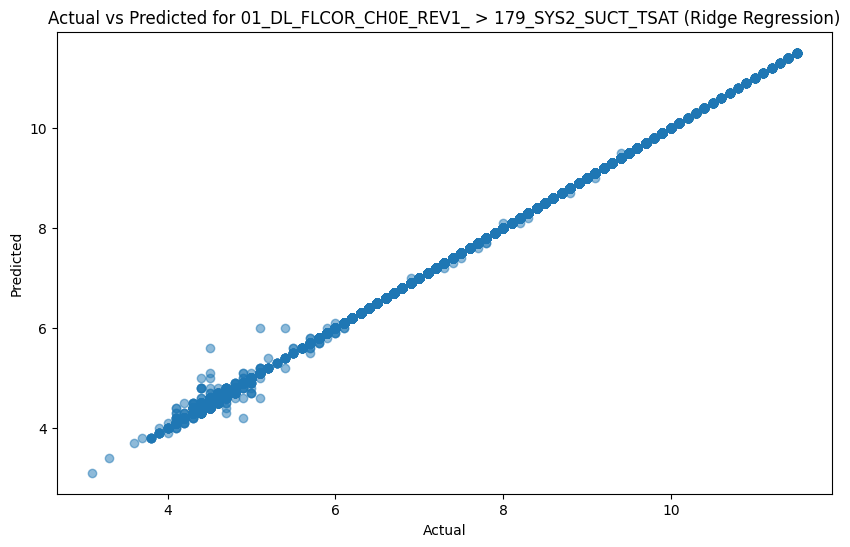

In [15]:
# Plotting actual vs predicted values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted for {target_column} (Ridge Regression)')
plt.show()

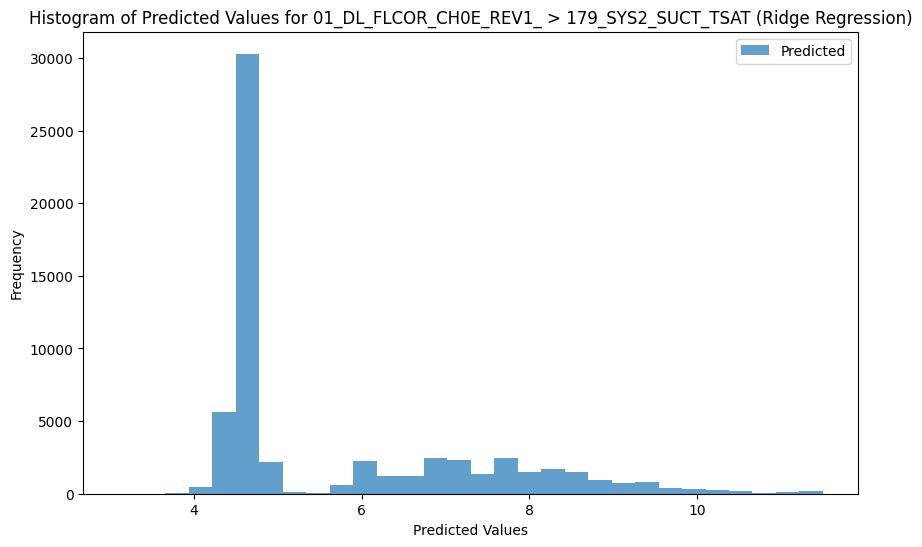

In [16]:
# Plotting a histogram of the predictions for Ridge Regression
plt.figure(figsize=(10, 6))
plt.hist(y_pred_ridge, bins=30, alpha=0.7, label='Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of Predicted Values for {target_column} (Ridge Regression)')
plt.legend()
plt.show()

In [17]:
# Predicting future behavior (10 days)
# Assuming the dataset has a uniform time interval, we predict the next 10 time steps
future_steps = 10

In [18]:
# Generating synthetic future data for prediction
last_value = X.iloc[-1].values[0]
future_X = np.array([last_value + i for i in range(1, future_steps + 1)]).reshape(-1, 1)

In [19]:
# Predicting future values
future_predictions = ridge_model.predict(future_X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [20]:
# Printing future predictions
print(f'Future Predictions for the next {future_steps} steps:')
for i, pred in enumerate(future_predictions, 1):
    print(f'Step {i}: {pred}')

Future Predictions for the next 10 steps:
Step 1: 4.610066350051108
Step 2: 4.620065912963202
Step 3: 4.630065475875296
Step 4: 4.64006503878739
Step 5: 4.650064601699484
Step 6: 4.660064164611578
Step 7: 4.670063727523672
Step 8: 4.680063290435766
Step 9: 4.69006285334786
Step 10: 4.700062416259954


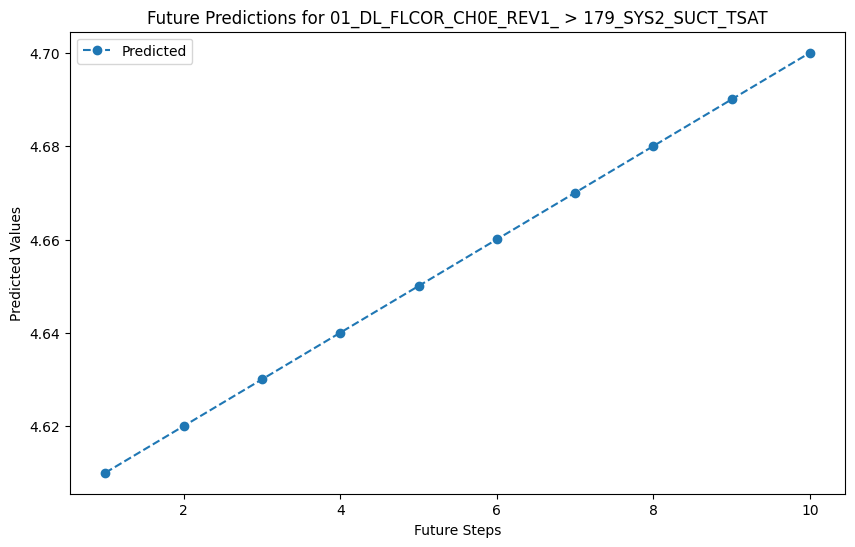

In [21]:
# Plotting future predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, future_steps + 1), future_predictions, marker='o', linestyle='--', label='Predicted')
plt.xlabel('Future Steps')
plt.ylabel('Predicted Values')
plt.title(f'Future Predictions for {target_column}')
plt.legend()
plt.show()